In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **First model to test**

In [2]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pt=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [18]:
import ipywidgets as widgets

In [19]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
# code to display an image
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [23]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"this is a cat: {is_cat}")
print(f'probs {probs}')

this is a cat: True
probs tensor([6.1894e-18, 1.0000e+00])


# **Camvid model to recognise object in autonomous driving system**

In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames = get_image_files(path/'images'),label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path/'codes.txt', dtype=str))

In [5]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 148MB/s] 


epoch,train_loss,valid_loss,time
0,2.997743,4.881633,00:02


epoch,train_loss,valid_loss,time
0,2.278463,1.821790,00:01
1,1.820746,1.354486,00:01
2,1.576103,1.159774,00:01
3,1.381855,1.066867,00:01
4,1.219438,0.939100,00:01
5,1.082668,0.905041,00:01
6,0.974869,0.908005,00:01
7,0.892772,0.893379,00:01


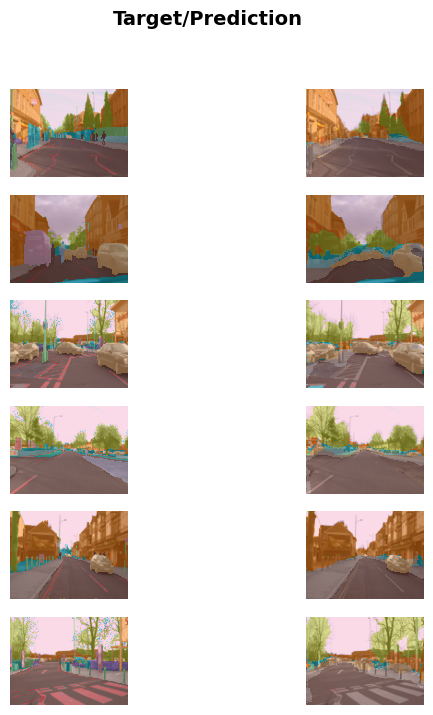

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

# **NLP example**

In [7]:
from fastai.text.all import *

In [10]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

/opt/conda/lib/python3.10/site-packages/fastai/text/learner.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.466077,0.409595,0.813400,03:24


epoch,train_loss,valid_loss,accuracy,time
0,0.307762,0.244694,0.901240,07:05
1,0.240411,0.225326,0.911920,07:06
2,0.187918,0.213831,0.919520,07:06
3,0.145520,0.199593,0.927880,07:06


# **High income predictor based on socio-economic background**

In [11]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary", 
                                 cat_names = ['workclass', 'education', 'marital-status', 
                                             'occupation', 'relationship','race'],
                                  cont_names = ['age','fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize]
                                 )
learn = tabular_learner(dls, metrics = accuracy)
learn.fit_one_cycle(3)

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.390667,0.365882,0.833231,00:05
1,0.355327,0.359097,0.836456,00:05
2,0.350112,0.349387,0.839527,00:05


In [ ]:
learn.predict("I really liked that movie")

# **Recommendataion examples**

In [13]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,0.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,12.165056,11.829394,00:00


epoch,train_loss,valid_loss,time
0,11.842019,11.829394,00:00
1,11.840077,11.829394,00:00
2,11.867992,11.829394,00:00
3,11.781855,11.829394,00:00
4,11.751169,11.829394,00:00
5,11.900580,11.829394,00:00
6,11.741123,11.829394,00:00
7,12.015973,11.829394,00:00
8,11.869585,11.829394,00:00
9,12.019596,11.829394,00:00


In [14]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,60.0,92.0,5.0,0.5
1,16.0,34.0,4.0,0.5
2,80.0,88.0,4.5,0.5
3,33.0,28.0,3.5,0.5
4,54.0,34.0,4.0,0.5
5,27.0,4.0,3.0,0.5
6,6.0,64.0,3.5,0.5
7,86.0,94.0,4.5,0.5
8,100.0,28.0,2.0,0.5


**End of chapter one**